In [91]:
import pandas as pd
df= pd.read_csv("dataset.csv")
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [92]:
df.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [93]:
df.shape

(48842, 15)

In [94]:
df.isna().sum() #checks for null values

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [95]:
df.describe() #exploring summary statistics

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [96]:
print(df.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


## Data Preprocessing

In [97]:
df.workclass.replace({'?':'Others'})
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [98]:
print(df['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [99]:
df.occupation.replace({'?':'Others'})
print(df['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [100]:
df=df[df['workclass']!='Without-pay']
df=df[df['workclass']!='Never-worked']
print(df['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [101]:
print(df.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [102]:
print(df.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [103]:
df.shape

(48811, 15)

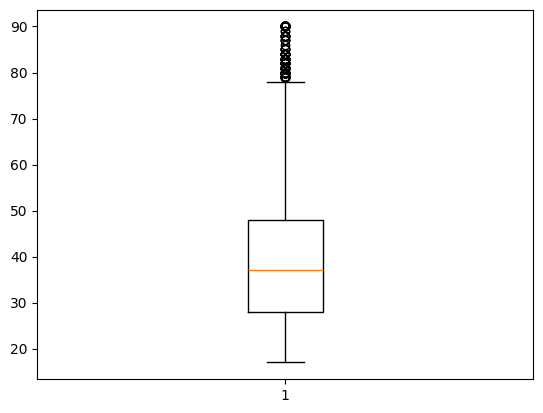

In [104]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(df['age'])
plt.show()

In [105]:
df= df[(df['age']<=75)&(df['age']>=17)]

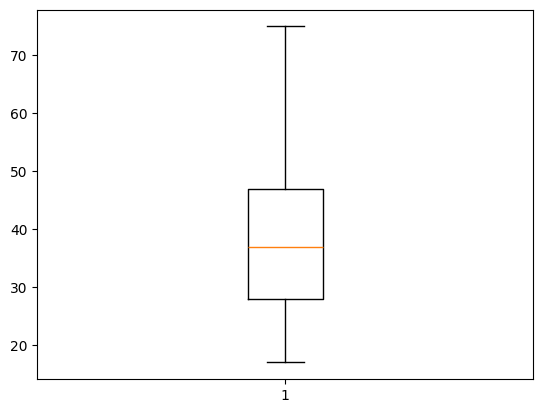

In [106]:
plt.boxplot(df['age'])
plt.show()

In [107]:
df.shape

(48438, 15)

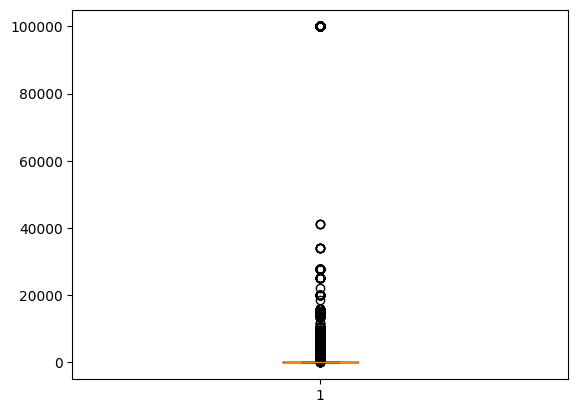

In [108]:
plt.boxplot(df['capital-gain'])
plt.show()

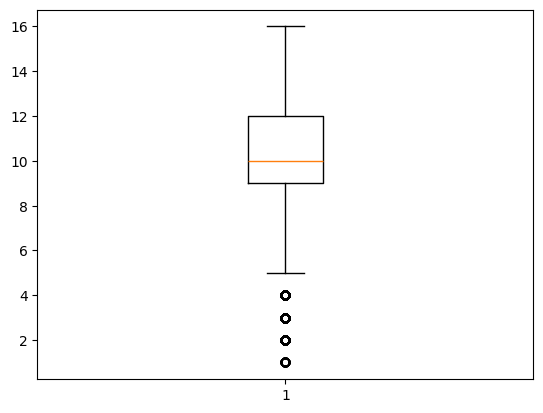

In [109]:
plt.boxplot(df['educational-num'])
plt.show()

In [110]:
df= df[(df['educational-num']<=16)&(df['educational-num']>=5)]

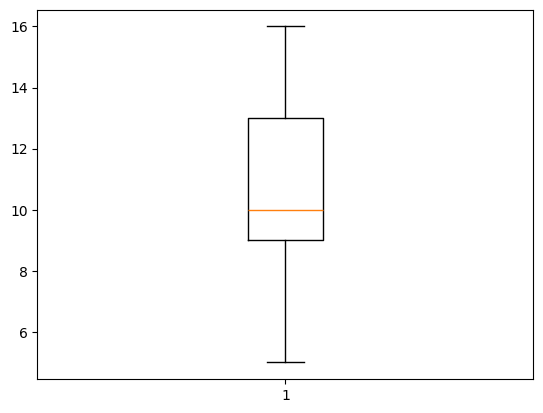

In [111]:
plt.boxplot(df['educational-num'])
plt.show()

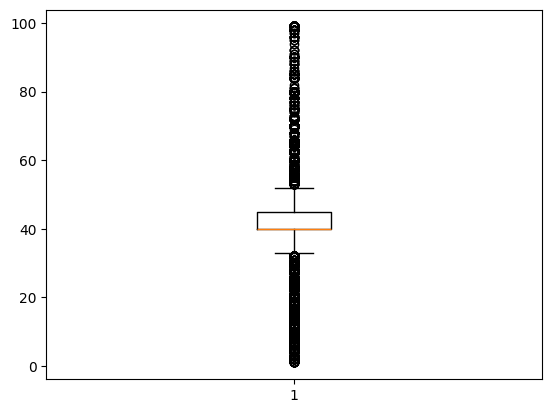

In [112]:
plt.boxplot(df['hours-per-week'])
plt.show()

In [113]:
df.shape

(46720, 15)

In [114]:
education_mapping = {
    'Preschool': 'School',
    '1st-4th': 'School',
    '5th-6th': 'School',
    '7th-8th': 'School',
    '9th': 'School',
    '10th': 'School',
    '11th': 'School',
    '12th': 'School',
    'HS-grad': 'HighSchool',
    'Some-college': 'Undergraduate',
    'Assoc-acdm': 'Undergraduate',
    'Assoc-voc': 'Undergraduate',
    'Bachelors': 'Undergraduate',
    'Masters': 'Postgraduate',
    'Doctorate': 'Postgraduate'
}


df['education'] = df['education'].apply(lambda x: education_mapping.get(x, str(x)))

# Ensure it's string type
df['education'] = df['education'].astype(str)

# Show result
print("Unique categories after mapping:")
print(df['education'].unique())


Unique categories after mapping:
['School' 'HighSchool' 'Undergraduate' 'Prof-school' 'Postgraduate']


In [115]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HighSchool,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Undergraduate,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Undergraduate,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Undergraduate,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Undergraduate,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HighSchool,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HighSchool,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HighSchool,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [116]:
from sklearn.preprocessing import LabelEncoder    #import library
encoder = LabelEncoder()    #create a LabelEncoder object
df['workclass'] = encoder.fit_transform(df['workclass'])    #encode 'workclass' with 7 unique categories(0 to 6)
df['marital-status'] = encoder.fit_transform(df['marital-status'])    #encode 'marital-status' with 3 unique categories
df['occupation'] = encoder.fit_transform(df['occupation'])     #encode 'occupation' with multiple categories
df['relationship'] = encoder.fit_transform(df['relationship'])    #encode 'relationship' with 5 unique categories(0 to 4)
df['race'] = encoder.fit_transform(df['race'])     #encode 'race' with multiple categories 
df['gender'] = encoder.fit_transform(df['gender'])     #encode 'gender' with 2 unique categories(0 and 1)
df['native-country'] = encoder.fit_transform(df['native-country'])     #encode 'native-country' with multiple categories

In [117]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,School,7,4,7,3,2,1,0,0,40,39,<=50K
1,38,3,89814,HighSchool,9,2,5,0,4,1,0,0,50,39,<=50K
2,28,2,336951,Undergraduate,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,Undergraduate,10,2,7,0,2,1,7688,0,40,39,>50K
4,18,0,103497,Undergraduate,10,4,0,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,Undergraduate,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,HighSchool,9,2,7,0,4,1,0,0,40,39,>50K
48839,58,3,151910,HighSchool,9,6,1,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,HighSchool,9,4,1,3,4,1,0,0,20,39,<=50K


In [118]:
x=df.drop(columns=['income'])
y=df['income']
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,School,7,4,7,3,2,1,0,0,40,39
1,38,3,89814,HighSchool,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,Undergraduate,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,Undergraduate,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,Undergraduate,10,4,0,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,Undergraduate,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,HighSchool,9,2,7,0,4,1,0,0,40,39
48839,58,3,151910,HighSchool,9,6,1,4,4,0,0,0,40,39
48840,22,3,201490,HighSchool,9,4,1,3,4,1,0,0,20,39


In [119]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
numerical_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Define models
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Loop through models with proper pipeline
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8429
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      7010
        >50K       0.72      0.60      0.66      2334

    accuracy                           0.84      9344
   macro avg       0.80      0.76      0.78      9344
weighted avg       0.84      0.84      0.84      9344

RandomForest Accuracy: 0.8419
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90      7010
        >50K       0.71      0.62      0.66      2334

    accuracy                           0.84      9344
   macro avg       0.79      0.77      0.78      9344
weighted avg       0.84      0.84      0.84      9344

KNN Accuracy: 0.8279
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7010
        >50K       0.67      0.61      0.64      2334

    accuracy                           0.83      9344
   macro avg       0.77      0.76      0.

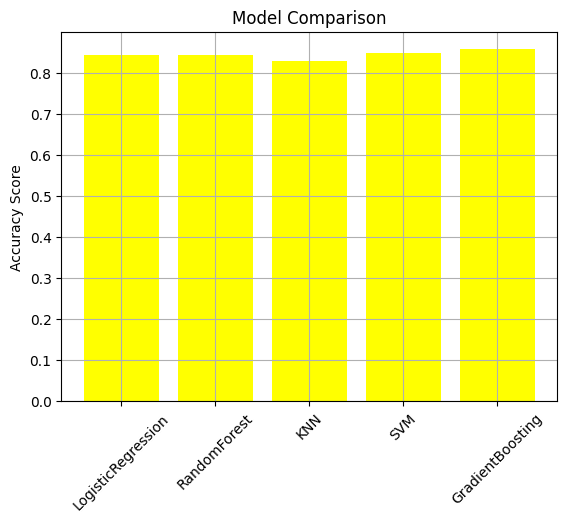

In [121]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='yellow')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### We can see that the GradientBoosting Classifier will provide more accurate prediction so we'll initialize and train this model on preprocessed data

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

x = pd.get_dummies(x)  # This will convert all categorical (object/string) columns

# Ensure no missing values
x = x.fillna(0)

joblib.dump(x.columns.tolist(), "model_columns.pkl") 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train and evaluate
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)

print(f"\n✅ Accuracy: {acc:.4f}")
print("✅ Classification Report:\n")
print(classification_report(y_test, preds))

# Save the model
joblib.dump(model, "usedmodel.pkl")
print("✅ Saved best model as usedmodel.pkl")



✅ Accuracy: 0.8586
✅ Classification Report:

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7010
        >50K       0.78      0.60      0.68      2334

    accuracy                           0.86      9344
   macro avg       0.83      0.77      0.79      9344
weighted avg       0.85      0.86      0.85      9344

✅ Saved best model as usedmodel.pkl


In [123]:
%%writefile p3.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model and training columns
model = joblib.load("usedmodel.pkl")
model_columns = joblib.load("model_columns.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs 
st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
gender = st.sidebar.selectbox("Gender", ["Male", "Female"]) 
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    input_encoded = pd.get_dummies(input_df)
    input_encoded = input_encoded.reindex(columns=model_columns, fill_value=0)
    prediction = model.predict(input_encoded)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    batch_encoded = pd.get_dummies(batch_data)
    batch_encoded = batch_encoded.reindex(columns=model_columns, fill_value=0)

    batch_preds = model.predict(batch_encoded)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())

    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting p3.py


In [124]:
!pip install streamlit pyngrok

In [125]:
!ngrok authtoken 30F098gMYCfHPjQaQbDeiFxwqan_5NA8BYuDXKzfDs7tqX4UL

Authtoken saved to configuration file: C:\Users\sanju\AppData\Local/ngrok/ngrok.yml


In [126]:
import os
import threading
def run_streamlit():
    os.system('streamlit run p3.py --server.port 8501')

thread= threading.Thread(target=run_streamlit)
thread.start()

In [128]:
from pyngrok import ngrok
import time

time.sleep(5)     #waiting for few seconds to make sure streamlit started

public_url= ngrok.connect(8501)      #create a tunnel to the Streamlit port 8501
print("Your streamlit app is live here:", public_url)

Your streamlit app is live here: NgrokTunnel: "https://95b7b18114ce.ngrok-free.app" -> "http://localhost:8501"
